In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import json

from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

from utils import read_data

import warnings
warnings.filterwarnings('ignore')

In [2]:
def fit_model(data):
    def model(N,slope,intercept):
        return slope*N+intercept
    # Extract data for N, log1r, approx
    N_data = data['N'].values
    log_density_data = data['log(opt_density)'].values
    density_data = data['opt_density'].values
    
    # Initial guesses for the parameters
    initial_guesses = [-0.1, 0.1]
    
    # Curve fitting
    params, covariance = curve_fit(model, N_data, log_density_data, p0=initial_guesses)

    # Calculate predictions and mean squared error
    predicted_log_density = np.exp(model(N_data, *params))
    mse = mean_squared_error(density_data, predicted_log_density)
    
    return params,mse

def optimized_model(p,n,params):
    return ((2*p+1)**2)*np.exp(params[0]*n+params[1])

In [3]:
idx_list = [i for i in range(48)]

In [4]:
N_list = [n for n in range(11,18)]
def get_path(N,idx):
    return f'distribution/max_k_colorable/n{N}_k3/{idx}.npy'

In [5]:
df_mkcs = read_data(N_list,idx_list,get_path)
df_density_mkcs = df_mkcs[df_mkcs['r']==1]
df_density_mkcs['log(opt_density)'] = np.log(df_density_mkcs['opt_density'])

100%|██████████| 336/336 [00:00<00:00, 426.24it/s]


In [6]:
N_list = [n for n in range(18,31,2)]
def get_path(N,idx):
    return f'distribution/max_k_vertex_cover/n{N}/{idx}.npy'
df_mkvc = read_data(N_list,idx_list,get_path)
df_density_mkvc = df_mkvc[df_mkcs['r']==1]
df_density_mkvc['log(opt_density)'] = np.log(df_density_mkvc['opt_density'])

100%|██████████| 336/336 [00:01<00:00, 326.80it/s]


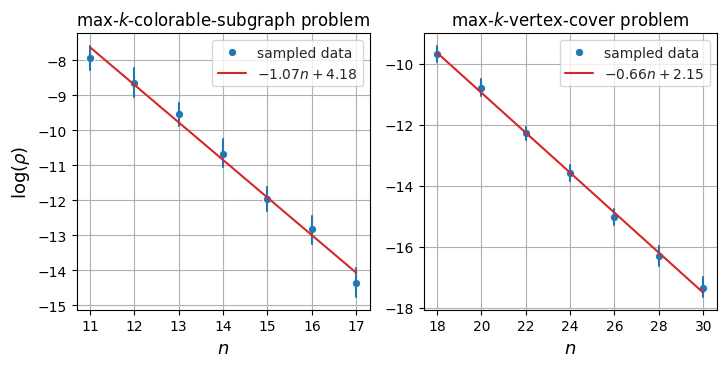

In [7]:
# 创建图和子图
fig, axs = plt.subplots(1, 2, figsize=(7.4, 4.2))  # 不共享 y 轴
sns.set_style('white')

# 定义每个 DataFrame 的数据集
datasets = [df_density_mkcs, df_density_mkvc]
titles = [r'max-$k$-colorable-subgraph problem', r'max-$k$-vertex-cover problem']

# 遍历每个数据集并分别绘制图
for i, (data, title) in enumerate(zip(datasets, titles)):
    params, mse = fit_model(data)
    colors = sns.color_palette()
    sns.set_style('white')
    N_list = np.sort(data['N'].unique()).tolist()
    sns.lineplot(x='N', y='log(opt_density)', data=data, marker='o', linestyle='', err_style='bars', label=r'sampled data', color=colors[0], ax=axs[i])
    
    # 修正 plt.plot，使用 axs[i].plot
    axs[i].plot(N_list, [params[0] * n + params[1] for n in N_list], color=colors[3], label=rf'${np.round(params[0], 2)}n+{np.round(params[1], 2)}$')

    axs[i].legend()
    axs[i].grid()
    axs[i].set_title(title)
    axs[i].set_xlabel(r"$n$", fontsize=13)

    # 只为第一个子图设置Y轴标签
    if i == 0:
        axs[i].set_ylabel(r"$\log(\rho)$", fontsize=13)
    else:
        axs[i].set_ylabel('')  # 后续的子图不显示Y轴标签

# 调整布局
plt.tight_layout(rect=[0, 0, 1, 0.9])  # 给上方的全局图例留出空间
plt.savefig('./figs/opt_density_fitting.pdf')
plt.show()
